### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 11\GMF-Investments-Portfolio-Management\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Start preprocessing

In [4]:
from scripts.finance_data_processor import FinanceDataProcessor

preprocessor = FinanceDataProcessor()

1) Get historical data from yfinance

In [5]:
# first define the start and end date
start_date = '2015-01-01' 
end_date = '2024-12-31'

# now define the symbols of the stocks to get historical data of
symbols = ['TSLA', 'BND', 'SPY']

result = preprocessor.fetch_data(
    start_date=start_date, 
    end_date=end_date, 
    tickers=symbols
)

Retrieving data for TSLA from 2015-01-01 to 2024-12-31...
Data for TSLA saved to '../data\TSLA.csv'.
Retrieving data for BND from 2015-01-01 to 2024-12-31...
Data for BND saved to '../data\BND.csv'.
Retrieving data for SPY from 2015-01-01 to 2024-12-31...
Data for SPY saved to '../data\SPY.csv'.


2) Load the downloaded data

In [6]:
tsla = preprocessor.read_data('TSLA')
bnd = preprocessor.read_data('BND')
spy = preprocessor.read_data('SPY')

3) Basic description of the data frames

In [7]:
tsla.describe()

,Open,High,Low,Close,Volume
count,2481.000000,2481.000000,2481.000000,2481.000000,2.481000e+03
mean,111.905041,114.403053,109.303978,111.890153,1.118377e+08
std,110.371880,112.886810,107.705892,110.302224,7.482119e+07
min,9.488000,10.331300,9.403330,9.578000,1.065416e+07
25%,17.099300,17.386700,16.800000,17.086000,6.625500e+07
50%,25.093300,25.509300,24.648700,25.166000,9.248894e+07
75%,217.897000,222.167000,212.530000,217.733000,1.295282e+08
max,411.470000,414.497000,405.667000,409.970000,9.140814e+08


In [8]:
bnd.describe()

,Open,High,Low,Close,Volume
count,2481.000000,2481.000000,2481.000000,2481.000000,2.481000e+03
mean,75.275884,75.381262,75.160585,75.272622,4.358350e+06
std,4.968928,4.970553,4.963029,4.967820,2.755311e+06
min,68.080000,68.375200,67.990000,68.040000,6.019573e+05
25%,71.878400,71.960000,71.786600,71.869300,2.266552e+06
50%,73.360000,73.444500,73.249000,73.350000,3.901235e+06
75%,79.815900,79.985700,79.655900,79.785300,5.685918e+06
max,86.385600,86.424300,86.279100,86.317600,3.193718e+07


In [9]:
spy.describe()

,Open,High,Low,Close,Volume
count,2481.000000,2481.000000,2481.000000,2481.000000,2.481000e+03
mean,318.493941,320.235050,316.608377,318.547732,9.358051e+07
std,112.550498,113.143931,111.897908,112.570587,5.087668e+07
min,161.473000,163.059000,159.768000,161.949000,2.116804e+07
25%,221.505000,221.981000,220.306000,221.178000,6.213793e+07
50%,283.917000,285.295000,282.459000,284.165000,8.087444e+07
75%,412.970000,414.570000,410.267000,412.740000,1.084854e+08
max,596.170000,599.640000,596.165000,598.190000,7.055181e+08


3) Detect the outlires

Outliers identified using Iqr method.


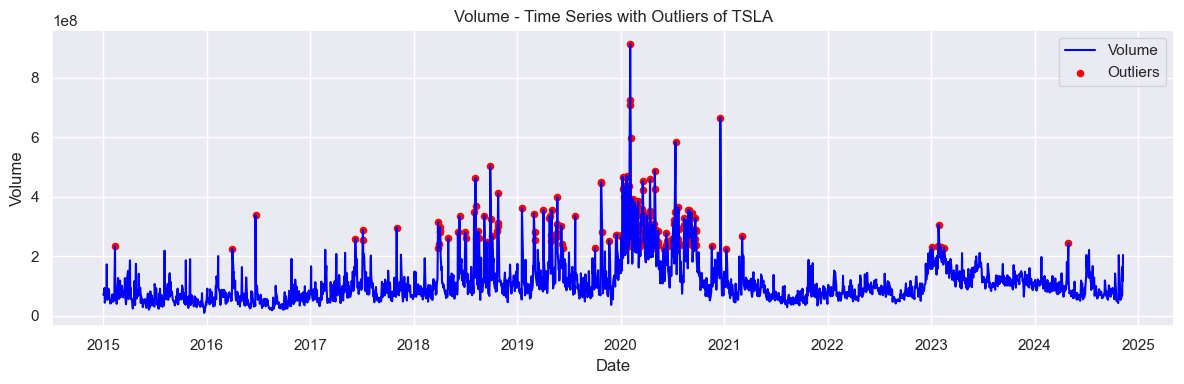

Outliers identified using Iqr method.


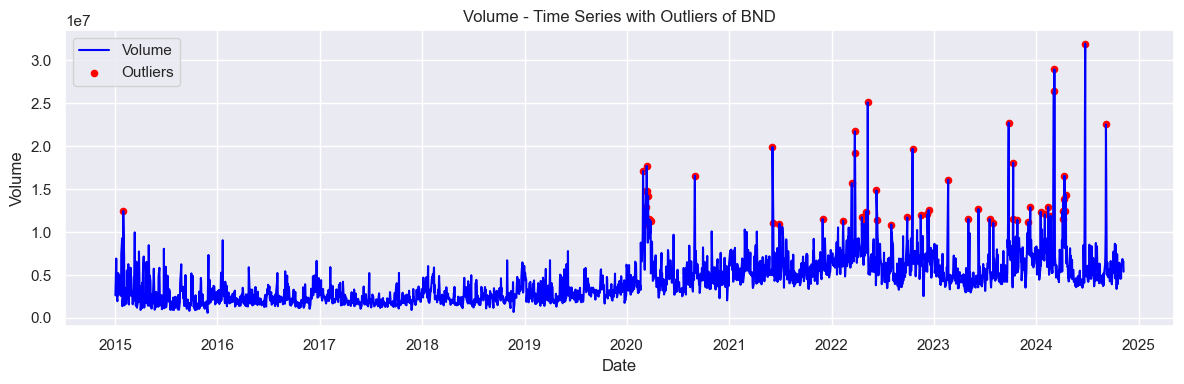

Outliers identified using Iqr method.


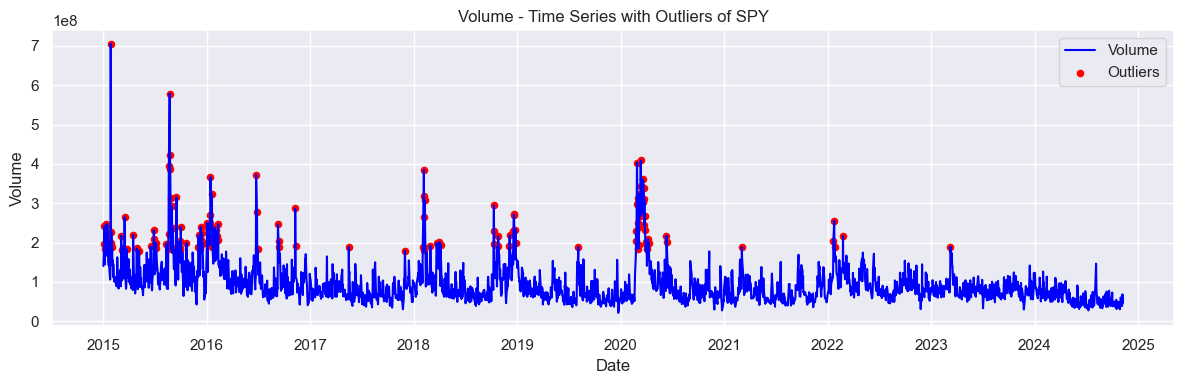

In [10]:
tsla_outliers = preprocessor.identify_outliers(tsla)
preprocessor.visualize_outliers(tsla, tsla_outliers, 'TSLA')

bnd_outliers = preprocessor.identify_outliers(bnd)
preprocessor.visualize_outliers(bnd, bnd_outliers, 'BND')

spy_outliers= preprocessor.identify_outliers(spy)
preprocessor.visualize_outliers(spy, spy_outliers, 'SPY')

Now that the outlires are detected, the next thing is to handle them. 

In [12]:
# Define dictionary for stock data for TSLA, BND, SPY
data_dict = {
    'TSLA': tsla,  
    'BND': bnd,    
    'SPY': spy     
}

# Outliers dictionary where each DataFrame has boolean values indicating outliers
outliers_dict = {
    'TSLA': tsla_outliers,  
    'BND': bnd_outliers, 
    'SPY': spy_outliers     
}

cleaned_data_dict = preprocessor.handle_outliers(data_dict, outliers_dict)
tsla_data = cleaned_data_dict['TSLA']
bnd_data = cleaned_data_dict['BND']
spy_data = cleaned_data_dict['SPY']

Outliers handled for TSLA by setting to NaN and filling.
Outliers handled for BND by setting to NaN and filling.
Outliers handled for SPY by setting to NaN and filling.


Now let us see the result of the handeling of the outliers

Outliers identified using Iqr method.


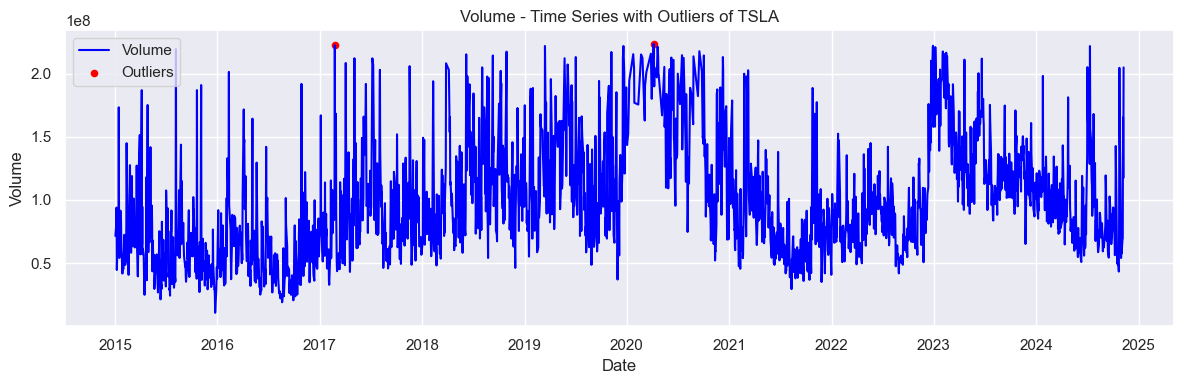

Outliers identified using Iqr method.
No outliers detected.
Outliers identified using Iqr method.


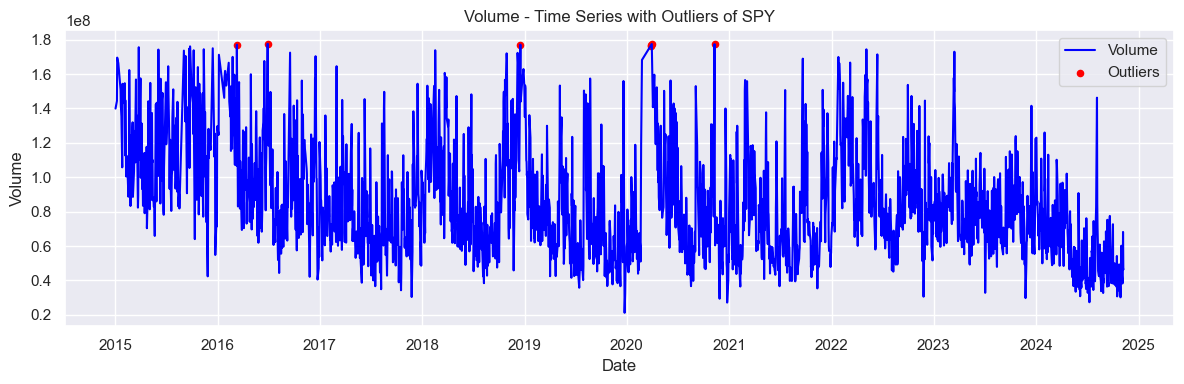

In [13]:
tsla_outliers = preprocessor.identify_outliers(tsla_data)
preprocessor.visualize_outliers(tsla_data, tsla_outliers, 'TSLA')

bnd_outliers = preprocessor.identify_outliers(bnd_data)
preprocessor.visualize_outliers(bnd_data, bnd_outliers, 'BND')

spy_outliers= preprocessor.identify_outliers(spy_data)
preprocessor.visualize_outliers(spy_data, spy_outliers, 'SPY')

It can be seen from the plot that number of outlires has been mitegated.